In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

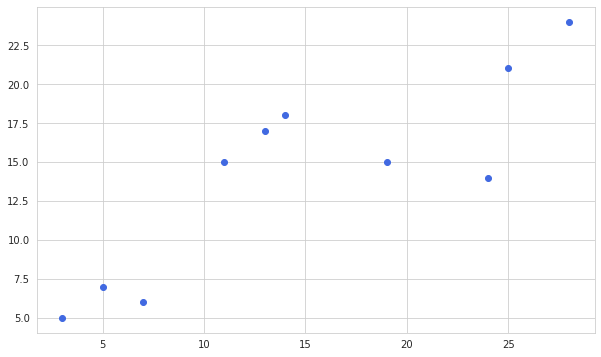

In [2]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(10,6))
x = np.array([3, 5, 7, 11, 13, 14, 19, 24, 25, 28])
y = np.array([5, 7, 6, 15, 17, 18, 15, 14, 21, 24])
ax.scatter(x, y, color='royalblue')
plt.savefig('../../assets/images/concepts/some_linear_distribution.png', bbox_inches='tight');

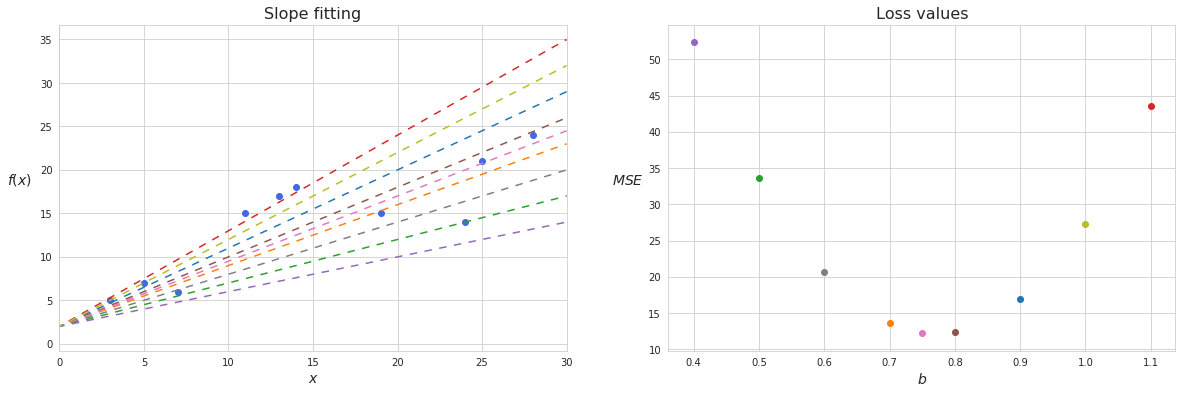

In [3]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(1, 2, figsize=(20,6))
x = np.array([3, 5, 7, 11, 13, 14, 19, 24, 25, 28])
y = np.array([5, 7, 6, 15, 17, 18, 15, 14, 21, 24])
ax[0].scatter(x, y, color='royalblue')

a = 2
x_s = np.linspace(-1, 30, 600)

# guess 1
bs = [0.9, 0.7, 0.5, 1.1, 0.4, 0.8, 0.75, 0.6, 1]
for b in bs:
    y1 = a + x_s * b
    ax[0].plot(x_s, y1, linestyle='--', dashes=(5,5))

    y1_s = a + x * b
    p_1 = np.sum((y1_s - y)**2) / len(y)
    ax[1].scatter(b, p_1)

ax[0].set_xlim(0, 30)
ax[0].set_xlabel('$x$', fontsize=14)
ax[0].set_ylabel('$f(x)$', fontsize=14, rotation=0, labelpad=20)

ax[1].set_xlabel('$b$', fontsize=14)
ax[1].set_ylabel('$MSE$', fontsize=14, rotation=0, labelpad=20)

ax[0].set_title('Slope fitting', fontsize=16)
ax[1].set_title('Loss values', fontsize=16)
plt.savefig('../../assets/images/concepts/loss_values_and_slope.png', bbox_inches='tight');